In [1]:
!pip3 install pandas
!pip3 install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import requests
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import json

In [3]:
df = pd.read_csv('./london_weather.csv')

In [4]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [7]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [8]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [9]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=1826)

12:26:33 - cmdstanpy - INFO - Chain [1] start processing
12:26:35 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
17126,2025-12-27
17127,2025-12-28
17128,2025-12-29
17129,2025-12-30


In [11]:
forecast = model.predict(future)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.073556,0.548005,7.888186,10.073556,10.073556,-5.967687,-5.967687,-5.967687,-0.009022,-0.009022,-0.009022,-5.958666,-5.958666,-5.958666,0.0,0.0,0.0,4.105869
1,1979-01-02,10.074010,0.506805,7.556920,10.074010,10.074010,-6.015453,-6.015453,-6.015453,-0.020539,-0.020539,-0.020539,-5.994914,-5.994914,-5.994914,0.0,0.0,0.0,4.058557
2,1979-01-03,10.074464,0.402987,7.721595,10.074464,10.074464,-5.986647,-5.986647,-5.986647,0.045498,0.045498,0.045498,-6.032145,-6.032145,-6.032145,0.0,0.0,0.0,4.087817
3,1979-01-04,10.074918,0.370766,7.741974,10.074918,10.074918,-6.045813,-6.045813,-6.045813,0.024069,0.024069,0.024069,-6.069882,-6.069882,-6.069882,0.0,0.0,0.0,4.029105
4,1979-01-05,10.075372,0.350977,7.244177,10.075372,10.075372,-6.115762,-6.115762,-6.115762,-0.008151,-0.008151,-0.008151,-6.107611,-6.107611,-6.107611,0.0,0.0,0.0,3.959610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,13.249573,3.758696,11.240933,12.847132,13.622951,-5.840213,-5.840213,-5.840213,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,13.249899,3.621004,11.178669,12.846653,13.623892,-5.840961,-5.840961,-5.840961,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,13.250225,3.503585,10.886687,12.846192,13.624832,-5.876358,-5.876358,-5.876358,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,13.250551,3.542363,10.970674,12.845750,13.625773,-5.919392,-5.919392,-5.919392,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


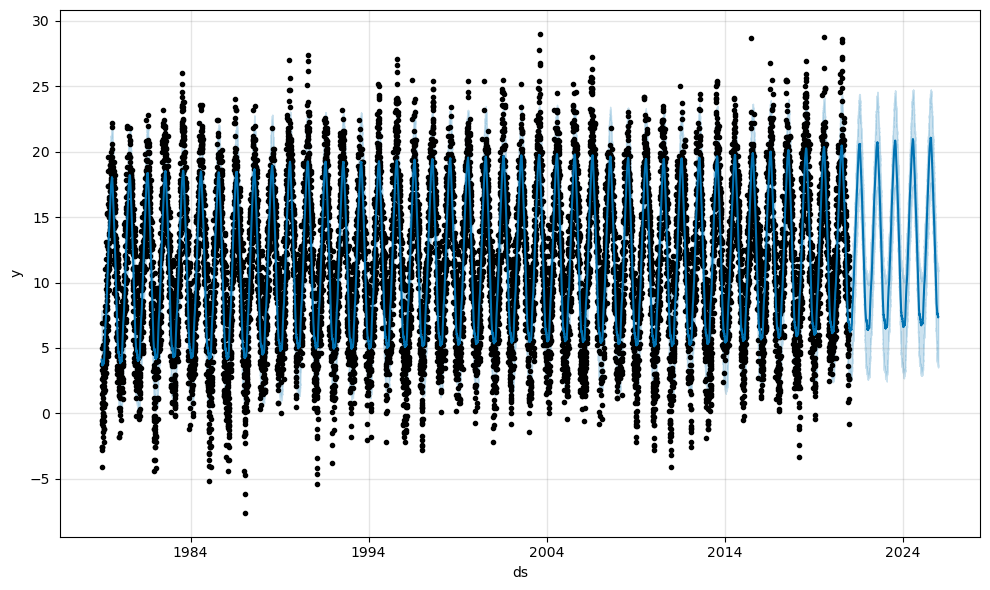

In [13]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)

In [14]:
max_df = df[['date', 'max_temp']]
max_df = max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

min_df = df[['date', 'min_temp']]
min_df = min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [15]:
model_max = Prophet()
model_max.fit(max_df)
future_max = model_max.make_future_dataframe(periods=1825)

model_min = Prophet()
model_min.fit(min_df)
future_min = model_min.make_future_dataframe(periods=1825)

12:26:38 - cmdstanpy - INFO - Chain [1] start processing
12:26:40 - cmdstanpy - INFO - Chain [1] done processing
12:26:41 - cmdstanpy - INFO - Chain [1] start processing
12:26:42 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast_max = model_max.predict(future_max)

forecast_min = model_min.predict(future_min)

C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


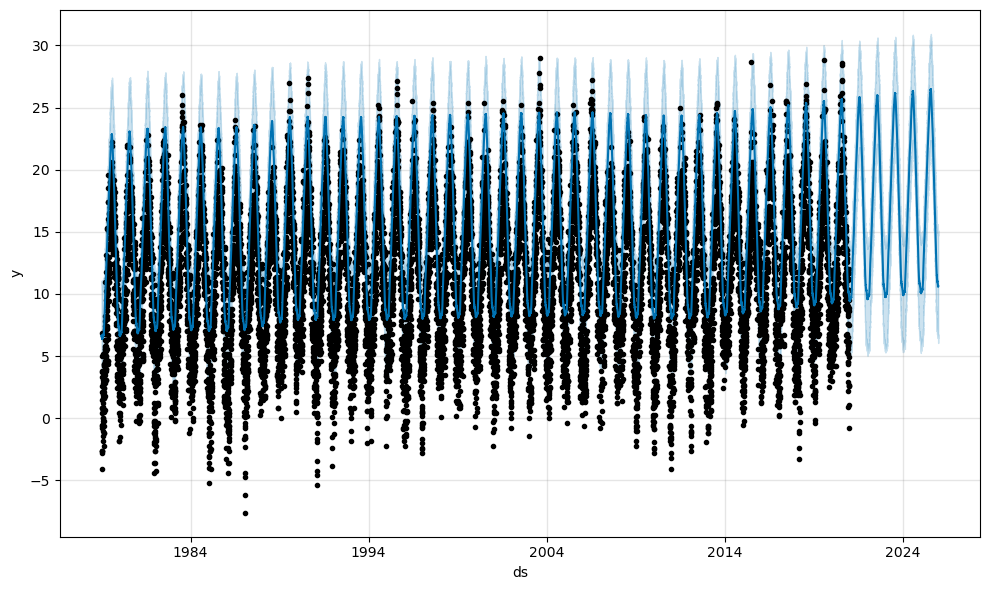

In [17]:
fig_max = model.plot(forecast_max)

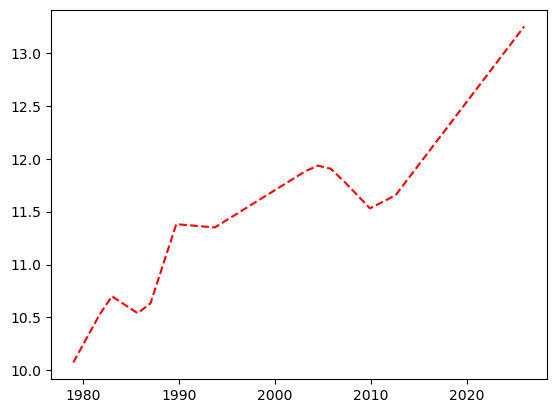

In [18]:
linear_reg_line = plt.plot(forecast['ds'], forecast['trend'], linestyle='--', color='red', label='Linear Regression Line')

In [19]:
forecast_ds_index = forecast.set_index('ds')

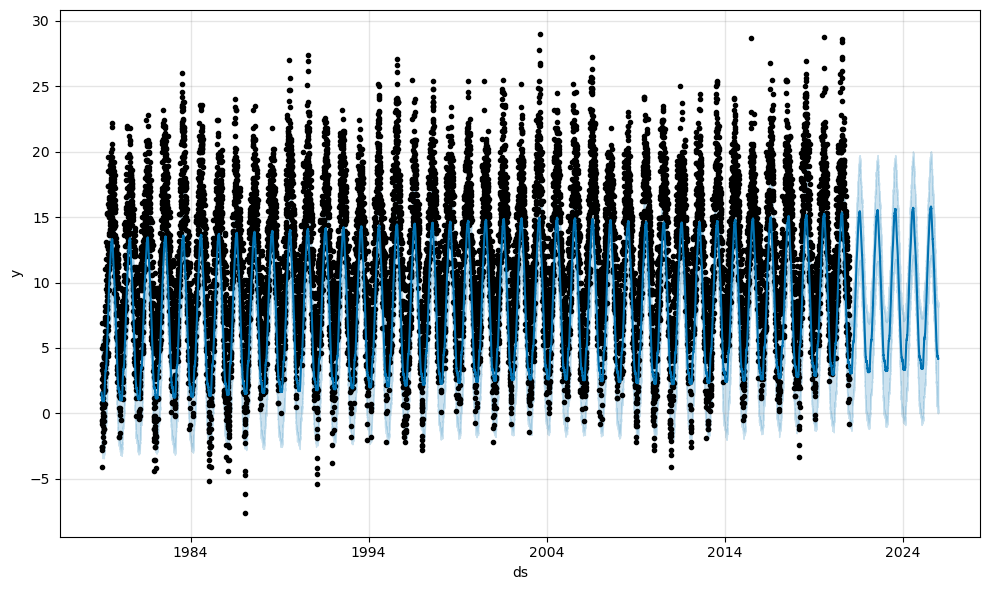

In [20]:
fig_min = model.plot(forecast_min)

<Axes: xlabel='ds'>

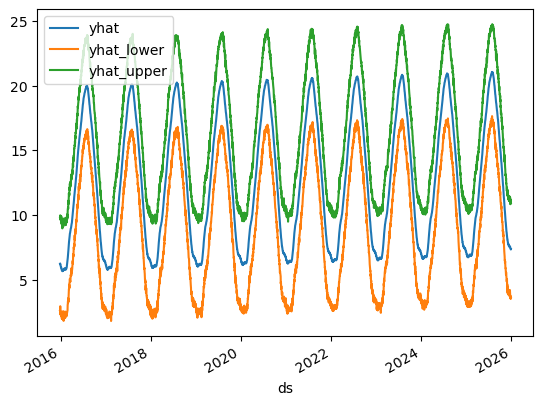

In [21]:
forecast_ds_index[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-3650:,:].plot()

In [22]:
# Prophet forecast with smaller dataseries
# 2016 - 2020, 2021- 2025 prediction

In [23]:
five_year_df = df.loc[df['date'] >= '2016']
five_year_df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
13514,2016-01-01,6.0,0.0,13.0,11.3,5.6,1.3,2.8,101690.0,0.0
13515,2016-01-02,8.0,0.0,13.0,9.7,6.8,2.2,5.6,99810.0,0.0
13516,2016-01-03,6.0,0.0,13.0,10.9,7.3,4.9,7.2,99180.0,0.0
13517,2016-01-04,4.0,3.2,36.0,10.1,8.3,5.7,0.4,98280.0,0.0
13518,2016-01-05,6.0,2.1,30.0,9.2,7.6,5.1,0.4,98470.0,0.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [24]:
five_year_mean_df = five_year_df[['date', 'mean_temp']]
five_year_mean_df = five_year_mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [25]:
model_5_year_mean = Prophet()
model_5_year_mean.fit(five_year_mean_df)
five_year_future_mean = model_5_year_mean.make_future_dataframe(periods=1826)

12:26:46 - cmdstanpy - INFO - Chain [1] start processing
12:26:46 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
forecast_5_year_mean = model_5_year_mean.predict(five_year_future_mean)
forecast_mean_comparison = forecast.loc[forecast['ds'] >= '2016']
model

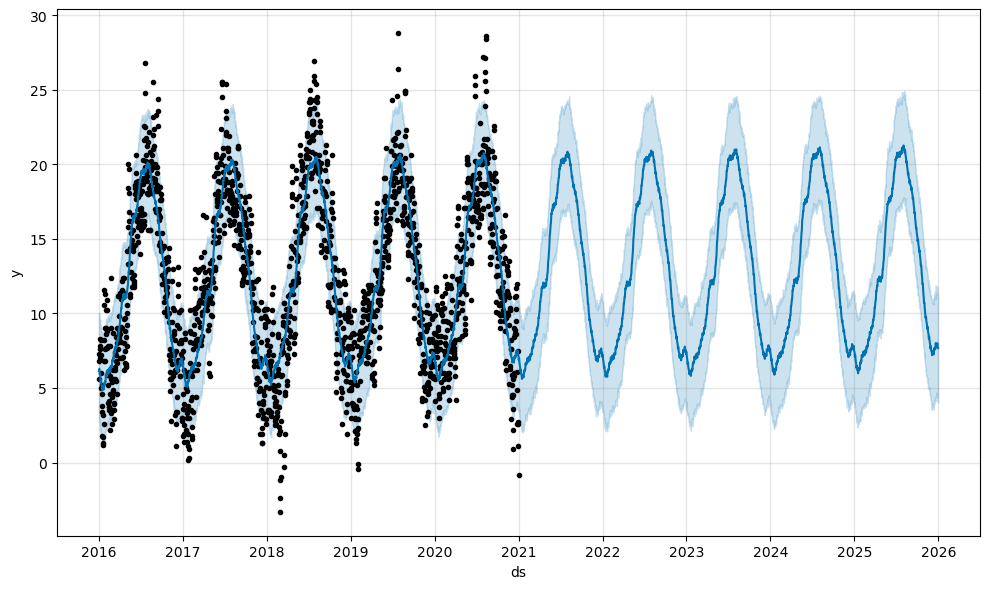

In [63]:
fig_5_year_mean = model_5_year_mean.plot(forecast_5_year_mean)

In [66]:
five_year_max_df = five_year_df[['date', 'max_temp']]
five_year_max_df = five_year_max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

five_year_min_df = five_year_df[['date', 'min_temp']]
five_year_min_df = five_year_min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [58]:
model_5_year_max = Prophet()
model_5_year_max.fit(five_year_max_df)
five_year_future_max = model_5_year_max.make_future_dataframe(periods=1825)

model_5_year_min = Prophet()
model_5_year_min.fit(five_year_min_df)
five_year_future_min = model_5_year_min.make_future_dataframe(periods=1825)

12:30:42 - cmdstanpy - INFO - Chain [1] start processing
12:30:42 - cmdstanpy - INFO - Chain [1] done processing
12:30:42 - cmdstanpy - INFO - Chain [1] start processing
12:30:42 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
forecast_5_year_max = model_5_year_max.predict(five_year_future_max)

forecast_5_year_min = model_5_year_min.predict(five_year_future_min)

C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


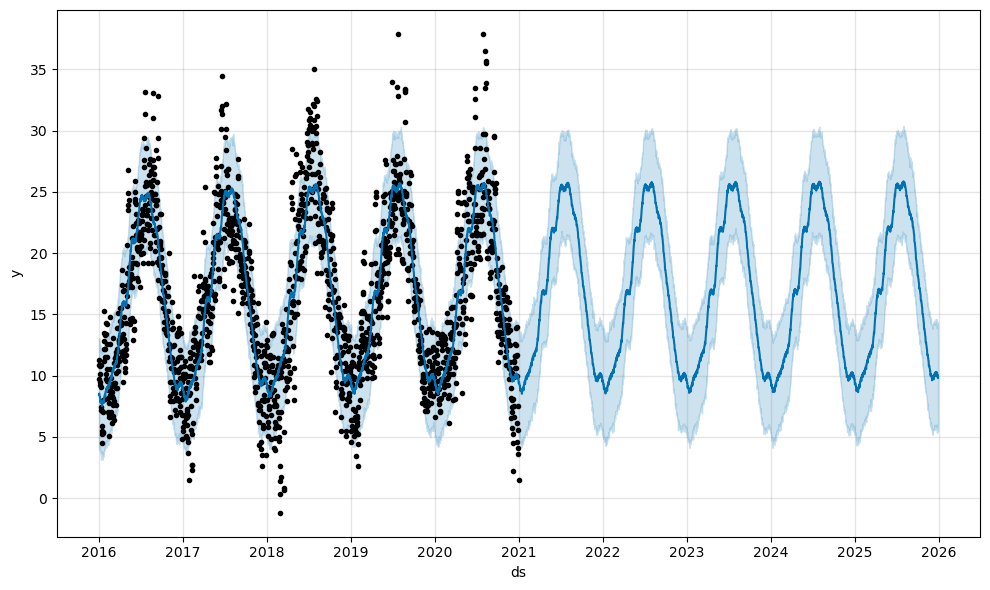

In [70]:
fig_5_year_max = model_5_year_max.plot(forecast_5_year_max)

C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


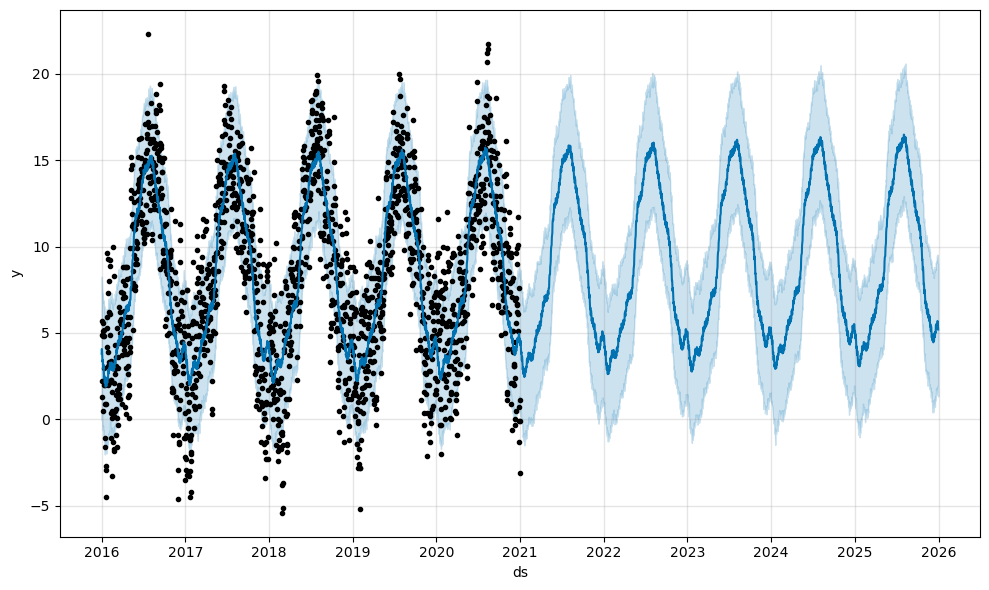

In [73]:
fig_5_year_min = model_5_year_min.plot(forecast_5_year_min)

In [29]:
# MAPE calculation using weather API

In [30]:
api = "http://api.openweathermap.org/geo/1.0/direct?q=London&limit=5&appid=284e496da06f1c5662d7a763ce4950b8"

get_api = requests.get(api)
get_api

<Response [200]>

In [31]:
get_api.json()

[{'name': 'London',
  'local_names': {'ny': 'London',
   'mn': 'Лондон',
   'te': 'లండన్',
   'az': 'London',
   'mt': 'Londra',
   'sm': 'Lonetona',
   'kk': 'Лондон',
   'av': 'Лондон',
   'my': 'လန်ဒန်မြို့',
   'ps': 'لندن',
   'ia': 'London',
   'bh': 'लंदन',
   'gd': 'Lunnainn',
   'eo': 'Londono',
   'fj': 'Lodoni',
   'yo': 'Lọndọnu',
   'rm': 'Londra',
   'gl': 'Londres',
   'su': 'London',
   'ha': 'Landan',
   'li': 'Londe',
   'bi': 'London',
   'feature_name': 'London',
   'sw': 'London',
   'ce': 'Лондон',
   'mk': 'Лондон',
   'ig': 'London',
   'da': 'London',
   'se': 'London',
   'ascii': 'London',
   'be': 'Лондан',
   'si': 'ලන්ඩන්',
   'br': 'Londrez',
   'sk': 'Londýn',
   'pl': 'Londyn',
   'cu': 'Лондонъ',
   'bs': 'London',
   'na': 'London',
   'ne': 'लन्डन',
   'ml': 'ലണ്ടൻ',
   'kv': 'Лондон',
   'pa': 'ਲੰਡਨ',
   'he': 'לונדון',
   'fo': 'London',
   'fa': 'لندن',
   'ar': 'لندن',
   'tk': 'London',
   'sv': 'London',
   'lo': 'ລອນດອນ',
   'ko': '런던',
   'lb

In [32]:
london = get_api.json()[0]
london

{'name': 'London',
 'local_names': {'ny': 'London',
  'mn': 'Лондон',
  'te': 'లండన్',
  'az': 'London',
  'mt': 'Londra',
  'sm': 'Lonetona',
  'kk': 'Лондон',
  'av': 'Лондон',
  'my': 'လန်ဒန်မြို့',
  'ps': 'لندن',
  'ia': 'London',
  'bh': 'लंदन',
  'gd': 'Lunnainn',
  'eo': 'Londono',
  'fj': 'Lodoni',
  'yo': 'Lọndọnu',
  'rm': 'Londra',
  'gl': 'Londres',
  'su': 'London',
  'ha': 'Landan',
  'li': 'Londe',
  'bi': 'London',
  'feature_name': 'London',
  'sw': 'London',
  'ce': 'Лондон',
  'mk': 'Лондон',
  'ig': 'London',
  'da': 'London',
  'se': 'London',
  'ascii': 'London',
  'be': 'Лондан',
  'si': 'ලන්ඩන්',
  'br': 'Londrez',
  'sk': 'Londýn',
  'pl': 'Londyn',
  'cu': 'Лондонъ',
  'bs': 'London',
  'na': 'London',
  'ne': 'लन्डन',
  'ml': 'ലണ്ടൻ',
  'kv': 'Лондон',
  'pa': 'ਲੰਡਨ',
  'he': 'לונדון',
  'fo': 'London',
  'fa': 'لندن',
  'ar': 'لندن',
  'tk': 'London',
  'sv': 'London',
  'lo': 'ລອນດອນ',
  'ko': '런던',
  'lb': 'London',
  'mi': 'Rānana',
  'et': 'London',
  '

In [33]:
london['lat']

51.5073219

In [34]:
london['lon']

-0.1276474

In [35]:
london_api = "https://api.openweathermap.org/data/3.0/onecall?lat=51.51&lon=-0.13&exclude=current,minutely,hourly,alerts&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric"
london_api

'https://api.openweathermap.org/data/3.0/onecall?lat=51.51&lon=-0.13&exclude=current,minutely,hourly,alerts&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric'

In [36]:
def get_api_london():
    response = requests.get(london_api)
    return response

api_response = get_api_london()

dates = []
min_temps = []
max_temps = []
max_temps = []
mean_temps = []

if api_response.status_code == 200:
    
    data = api_response.json()
        
    daily_forecast = data['daily']

    for day in daily_forecast:
        date = day['dt']
        min_temp = day['temp']['min']
        max_temp = day['temp']['max']
        mean_temp = day['temp']['day']
        

        
        dates.append(date)
        min_temps.append(min_temp)
        max_temps.append(max_temp)
        mean_temps.append(mean_temp)

else:
    print("Error: Unable to fetch data from the API.")
    
weather_df = pd.DataFrame({
    'ds': dates,
    'Minimum Temperature (C)': min_temps,
    'Maximum Temperature (C)': max_temps,
    'Average Temperature (C)': mean_temps
})

weather_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C)
0,1707652800,6.16,10.76,10.31
1,1707739200,4.60,8.92,7.74
2,1707825600,4.97,10.29,9.12
3,1707912000,10.48,12.94,12.94
4,1707998400,10.88,11.96,11.21
5,1708084800,9.50,12.54,10.05
6,1708171200,8.35,12.25,10.78
7,1708257600,10.74,12.46,12.46


In [37]:
weather_df["ds"] = weather_df["ds"]-(12*60*60)

In [38]:
weather_df.dtypes

ds                           int64
Minimum Temperature (C)    float64
Maximum Temperature (C)    float64
Average Temperature (C)    float64
dtype: object

In [39]:
weather_df['ds'] = pd.to_datetime(weather_df['ds'], unit='s')

In [40]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-02-11,6.16,10.76,10.31,13.026314,2.852248,10.312972,12.847018,13.191918,-6.271805,...,-0.002883,-0.002883,-0.002883,-6.268922,-6.268922,-6.268922,0.0,0.0,0.0,6.754509
1,2024-02-12,4.60,8.92,7.74,13.026640,3.021878,10.301806,12.847120,13.192469,-6.280234,...,-0.009022,-0.009022,-0.009022,-6.271213,-6.271213,-6.271213,0.0,0.0,0.0,6.746406
2,2024-02-13,4.97,10.29,9.12,13.026966,2.994519,10.280977,12.847222,13.193019,-6.291038,...,-0.020539,-0.020539,-0.020539,-6.270499,-6.270499,-6.270499,0.0,0.0,0.0,6.735928
3,2024-02-14,10.48,12.94,12.94,13.027292,3.336412,10.346959,12.847324,13.193569,-6.220446,...,0.045498,0.045498,0.045498,-6.265944,-6.265944,-6.265944,0.0,0.0,0.0,6.806846
4,2024-02-15,10.88,11.96,11.21,13.027618,3.226857,10.482246,12.847427,13.194119,-6.232657,...,0.024069,0.024069,0.024069,-6.256726,-6.256726,-6.256726,0.0,0.0,0.0,6.794961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,NaN,NaN,NaN,13.249573,3.758696,11.240933,12.847132,13.622951,-5.840213,...,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,NaN,NaN,NaN,13.249899,3.621004,11.178669,12.846653,13.623892,-5.840961,...,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,NaN,NaN,NaN,13.250225,3.503585,10.886687,12.846192,13.624832,-5.876358,...,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,NaN,NaN,NaN,13.250551,3.542363,10.970674,12.845750,13.625773,-5.919392,...,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


In [41]:
mape_df = mape_df[["ds","Minimum Temperature (C)","Maximum Temperature (C)","Average Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,trend_lower,trend_upper
0,2024-02-11,6.16,10.76,10.31,13.026314,12.847018,13.191918
1,2024-02-12,4.60,8.92,7.74,13.026640,12.847120,13.192469
2,2024-02-13,4.97,10.29,9.12,13.026966,12.847222,13.193019
3,2024-02-14,10.48,12.94,12.94,13.027292,12.847324,13.193569
4,2024-02-15,10.88,11.96,11.21,13.027618,12.847427,13.194119
...,...,...,...,...,...,...,...
17126,2025-12-27,NaN,NaN,NaN,13.249573,12.847132,13.622951
17127,2025-12-28,NaN,NaN,NaN,13.249899,12.846653,13.623892
17128,2025-12-29,NaN,NaN,NaN,13.250225,12.846192,13.624832
17129,2025-12-30,NaN,NaN,NaN,13.250551,12.845750,13.625773


In [42]:
#MAPE - mean temp

In [43]:
mape_df['Absolute Error'] = abs(mape_df['Average Temperature (C)'] - mape_df['trend'])
mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Average Temperature (C)']) * 100
mape_df['Absolute Percentage Error'] = abs(mape_df['Percentage Error'])
mape_df['MAPE_mean'] = mape_df['Absolute Percentage Error'].mean()


C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\979071675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Absolute Error'] = abs(mape_df['Average Temperature (C)'] - mape_df['trend'])
C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\979071675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Average Temperature (C)']) * 100
C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\979071675.py:3: SettingWithCopyWarning: 
A value i

<Axes: xlabel='ds'>

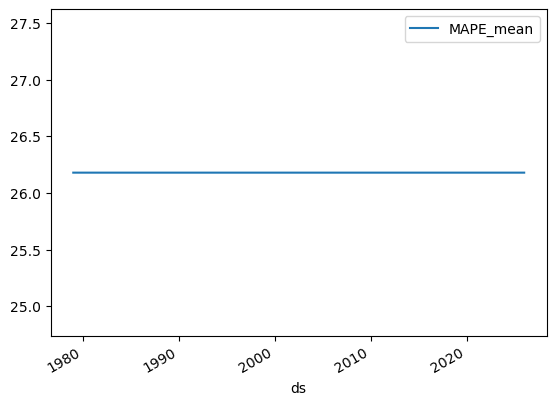

In [44]:
mape_df.plot(x='ds',y='MAPE_mean')

In [45]:
#MAPE - min temp

In [46]:
mape_df['Absolute Error'] = abs(mape_df['Minimum Temperature (C)'] - mape_df['trend_lower'])
mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Minimum Temperature (C)']) * 100
mape_df['Absolute Percentage Error'] = abs(mape_df['Percentage Error'])
mape_df['MAPE_min'] = mape_df['Absolute Percentage Error'].mean()

C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\331237815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Absolute Error'] = abs(mape_df['Minimum Temperature (C)'] - mape_df['trend_lower'])
C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\331237815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Minimum Temperature (C)']) * 100
C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\331237815.py:3: SettingWithCopyWarning: 
A v

<Axes: xlabel='ds'>

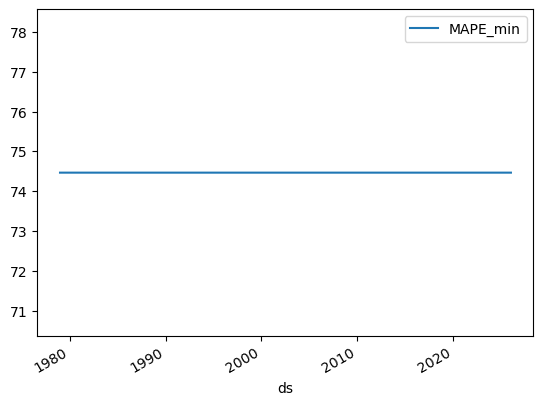

In [47]:
mape_df.plot(x='ds',y='MAPE_min')

In [48]:
#MAPE - max temp

In [49]:
mape_df['Absolute Error'] = abs(mape_df['Maximum Temperature (C)'] - mape_df['trend_upper'])
mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Maximum Temperature (C)']) * 100
mape_df['Absolute Percentage Error'] = abs(mape_df['Percentage Error'])
mape_df['MAPE_max'] = mape_df['Absolute Percentage Error'].mean()

C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\1260846742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Absolute Error'] = abs(mape_df['Maximum Temperature (C)'] - mape_df['trend_upper'])
C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\1260846742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Maximum Temperature (C)']) * 100
C:\Users\jnpre\AppData\Local\Temp\ipykernel_20236\1260846742.py:3: SettingWithCopyWarning: 


<Axes: xlabel='ds'>

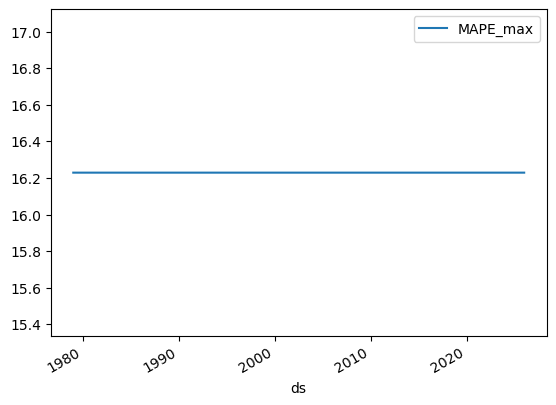

In [50]:
mape_df.plot(x='ds',y='MAPE_max')

In [51]:
##Cross Validation

In [52]:
prophet_validation = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/80 [00:00<?, ?it/s]

12:26:51 - cmdstanpy - INFO - Chain [1] start processing
12:26:51 - cmdstanpy - INFO - Chain [1] done processing
12:26:51 - cmdstanpy - INFO - Chain [1] start processing
12:26:51 - cmdstanpy - INFO - Chain [1] done processing
12:26:52 - cmdstanpy - INFO - Chain [1] start processing
12:26:52 - cmdstanpy - INFO - Chain [1] done processing
12:26:52 - cmdstanpy - INFO - Chain [1] start processing
12:26:52 - cmdstanpy - INFO - Chain [1] done processing
12:26:52 - cmdstanpy - INFO - Chain [1] start processing
12:26:52 - cmdstanpy - INFO - Chain [1] done processing
12:26:52 - cmdstanpy - INFO - Chain [1] start processing
12:26:53 - cmdstanpy - INFO - Chain [1] done processing
12:26:53 - cmdstanpy - INFO - Chain [1] start processing
12:26:53 - cmdstanpy - INFO - Chain [1] done processing
12:26:53 - cmdstanpy - INFO - Chain [1] start processing
12:26:53 - cmdstanpy - INFO - Chain [1] done processing
12:26:54 - cmdstanpy - INFO - Chain [1] start processing
12:26:54 - cmdstanpy - INFO - Chain [1]

In [53]:
prophet_validation

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1981-01-26,4.652565,1.202392,7.667743,6.3,1981-01-25
1,1981-01-27,4.737007,1.470200,8.327901,8.4,1981-01-25
2,1981-01-28,4.819212,1.396861,7.952121,7.2,1981-01-25
3,1981-01-29,4.863783,1.470601,8.163535,7.0,1981-01-25
4,1981-01-30,4.620855,1.250250,8.039035,0.1,1981-01-25
...,...,...,...,...,...,...
29125,2020-12-27,6.717418,3.089500,10.287466,7.5,2020-01-01
29126,2020-12-28,6.700298,2.892613,10.197894,1.1,2020-01-01
29127,2020-12-29,6.652531,2.886089,10.556949,2.6,2020-01-01
29128,2020-12-30,6.682577,2.990618,10.222480,2.7,2020-01-01


In [54]:
prophet_performance = performance_metrics(prophet_validation)
prophet_performance

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,8.292955,2.879749,2.307591,0.171572,0.294249,0.790156
1,38 days,8.234724,2.869621,2.300345,0.170069,0.295072,0.791406
2,39 days,8.193117,2.862362,2.295865,0.169223,0.295465,0.793340
3,40 days,8.243258,2.871107,2.304726,0.170174,0.297539,0.792654
4,41 days,8.255745,2.873281,2.307808,0.170174,0.297949,0.792482
...,...,...,...,...,...,...,...
324,361 days,9.010016,3.001669,2.422599,0.185046,0.302320,0.771198
325,362 days,9.044015,3.007327,2.426777,0.184527,0.303167,0.770421
326,363 days,8.994570,2.999095,2.417881,0.184104,0.302354,0.771292
327,364 days,8.986715,2.997785,2.416946,0.183212,0.302255,0.771812


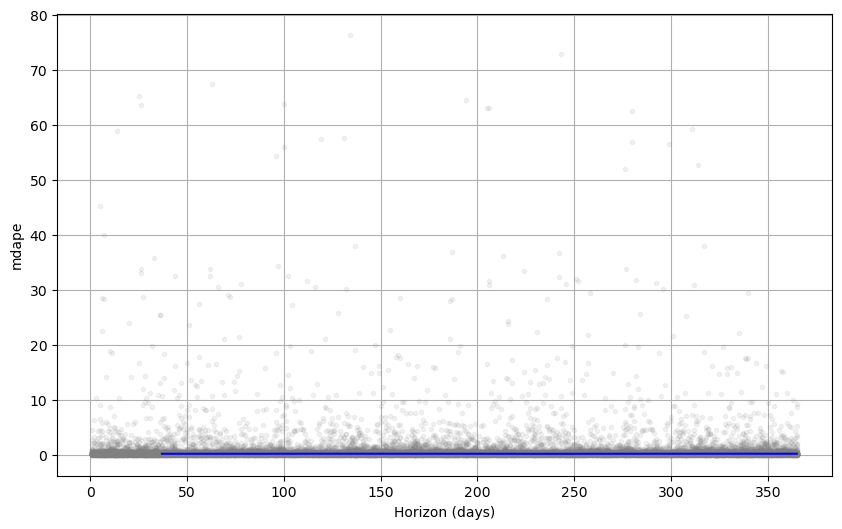

In [55]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')

(0.0, 1.0)

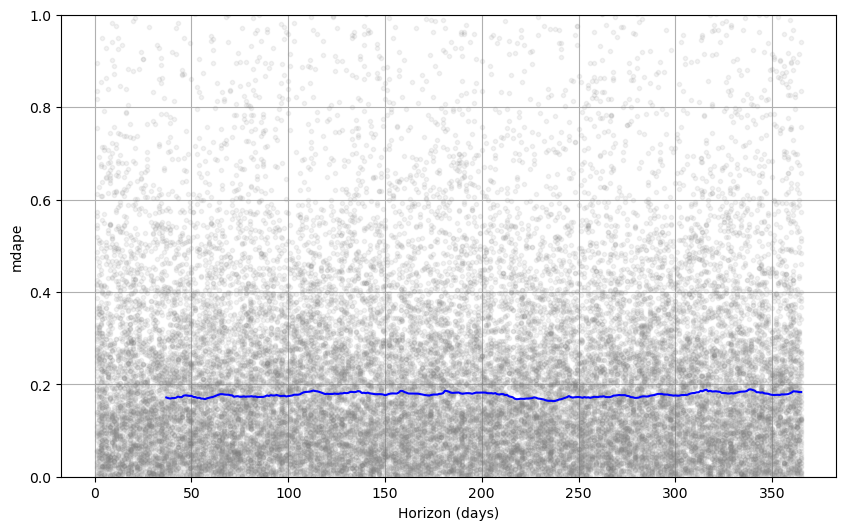

In [56]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')
plt.ylim(0,1)

In [57]:
# Over time the changes stay consistent around 18%